In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import random

#Imported a lot of packages so that I can decide what all I want to use later...

In [2]:
candidate_info_df = pd.read_csv('full_candidate_info.zip')
candidate_info_df.tail(50)

,Candidate_Name,Candidate_Party,State,District,Is_Incumbent?,Is_Winner,Percent_of_Vote_(%),Money_Raised_($),Money_Spent_($)
827,Don Beyer,Democrat,Virginia,8,Yes,Yes,75.8,1729482,2071906
828,Jeff Jordan,Republican,Virginia,8,No,No,24.0,96035,96035
829,Heerak Christian Kim,Independent,Virginia,8,No,No,NaN,2036,1921
830,Morgan Griffith,Republican,Virginia,9,Yes,Yes,94.0,873612,463916
831,Jennifer Wexton,Democrat,Virginia,10,Yes,Yes,56.5,3855331,1772250
832,Aliscia Andrews,Republican,Virginia,10,No,No,43.4,1567598,1413145
833,Gerry Connolly,Democrat,Virginia,11,Yes,Yes,71.4,1998592,1811776
834,Manga Anantatmula,Republican,Virginia,11,No,No,28.3,282152,268326
835,Stevan Porter,Libertarian,Virginia,11,No,No,NaN,533,1316
836,Suzan DelBene,Democrat,Washington,1,Yes,Yes,58.6,2182985,1897162


In [3]:
#Made a dataframe of just the winners
winner_df = candidate_info_df[candidate_info_df['Is_Winner']=='Yes']

#Made a dataframe that indicated the max $ raised in each state/district pair.
max_raised = candidate_info_df.groupby(['State','District'],as_index=False)['Money_Raised_($)'].max()
max_raised = max_raised.rename(columns = {'Money_Raised_($)':'Most_$_Raised_In_District'}).copy()

#Made a dataframe that indicated the max $ spent in each state/district pair.
max_spent = candidate_info_df.groupby(['State','District'],as_index=False)['Money_Spent_($)'].max()
max_spent = max_spent.rename(columns = {'Money_Spent_($)':'Most_$_Spent_In_District'}).copy()

#Merged max raised and max spent dataframes with winner_df.
winner_df = winner_df.merge(max_raised,on=['State','District'],how='inner').copy()
winner_df = winner_df.merge(max_spent,on=['State','District'],how='inner').copy()

winner_df.head()

,Candidate_Name,Candidate_Party,State,District,Is_Incumbent?,Is_Winner,Percent_of_Vote_(%),Money_Raised_($),Money_Spent_($),Most_$_Raised_In_District,Most_$_Spent_In_District
0,Jerry Carl,Republican,Alabama,1,No,Yes,64.9,1971321,1859349,1971321,1859349
1,Barry Moore,Republican,Alabama,2,No,Yes,65.3,650807,669368,650807,669368
2,Mike D Rogers,Republican,Alabama,3,Yes,Yes,67.5,1193111,1218564,1193111,1218564
3,Robert B Aderholt,Republican,Alabama,4,Yes,Yes,82.5,1255076,1323812,1255076,1323812
4,Mo Brooks,Republican,Alabama,5,Yes,Yes,95.8,655365,210045,655365,210045


In [4]:
#Compares two columns to see if they are equal. Returns Yes/No.
def compare_cols(cols):
    '''Compares two columns to see if they are equal. Returns Yes/No.'''
    if cols[0]==cols[1]:
        return 'Yes'
    else:
        return 'No'

**How often does the candidate who raised more money win a race?**

The percent of winners that raised the most in their district was 88.73%!


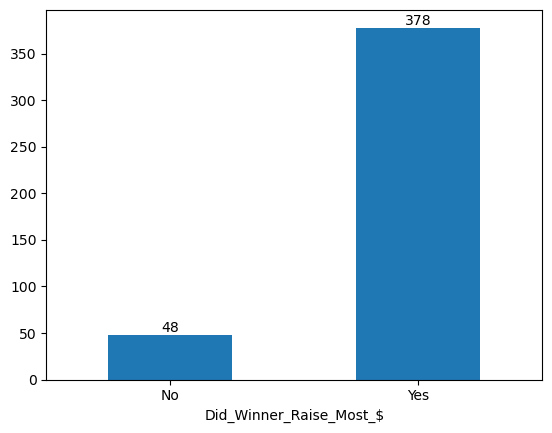

In [5]:
winner_df['Did_Winner_Raise_Most_$'] = winner_df[['Money_Raised_($)','Most_$_Raised_In_District']].apply(compare_cols,axis=1)

raisey_winners = winner_df.groupby(['Did_Winner_Raise_Most_$']).count()['Most_$_Raised_In_District']
pct_raisey_winners = raisey_winners['Yes']/raisey_winners.sum()*100
print(f'The percent of winners that raised the most in their district was {pct_raisey_winners:.2f}%!')

raisey_winner_bar = raisey_winners.plot.bar(rot=0)
raisey_winner_bar.bar_label(raisey_winner_bar.containers[0]);

**How often does the candidate who spent more money win a race?**

The percent of winners that spent the most in their district was 88.03%!


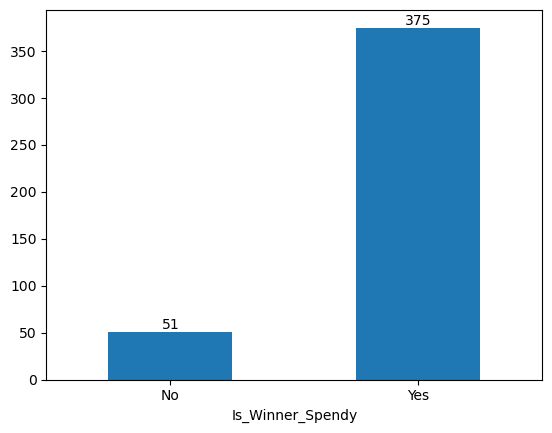

In [6]:
winner_df['Is_Winner_Spendy'] = winner_df[['Money_Spent_($)','Most_$_Spent_In_District']].apply(compare_cols,axis=1)

spendy_winners = winner_df.groupby(['Is_Winner_Spendy']).count()['Most_$_Spent_In_District']
pct_spendy_winners = spendy_winners['Yes']/spendy_winners.sum()*100
print(f'The percent of winners that spent the most in their district was {pct_spendy_winners:.2f}%!')

spendy_winner_bar = spendy_winners.plot.bar(rot=0)
spendy_winner_bar.bar_label(spendy_winner_bar.containers[0]);

**How often does the incumbent candidate win a race?**

The percent of winners that were incumbents was 86.15%!


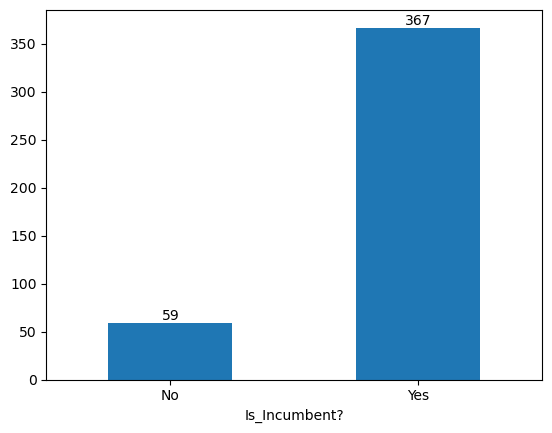

In [7]:
incumbent_winners = winner_df.groupby(['Is_Incumbent?']).count()['Candidate_Name']
pct_incumbent_winners = incumbent_winners['Yes']/incumbent_winners.sum()*100
print(f'The percent of winners that were incumbents was {pct_incumbent_winners:.2f}%!')

incumbent_winner_bar = incumbent_winners.plot.bar(rot=0)
incumbent_winner_bar.bar_label(incumbent_winner_bar.containers[0]);

In [8]:
incumbent_df = candidate_info_df[candidate_info_df['Is_Incumbent?']=='Yes']
incumbent_df = incumbent_df.merge(max_raised,on=['State','District'],how='inner').copy()
incumbent_df = incumbent_df.merge(max_spent,on=['State','District'],how='inner').copy()

**Can you detect any relationship between amount of money raised and the incumbent status of a candidate?**

The percent of incumbents that raised the most in their district was 92.89%!


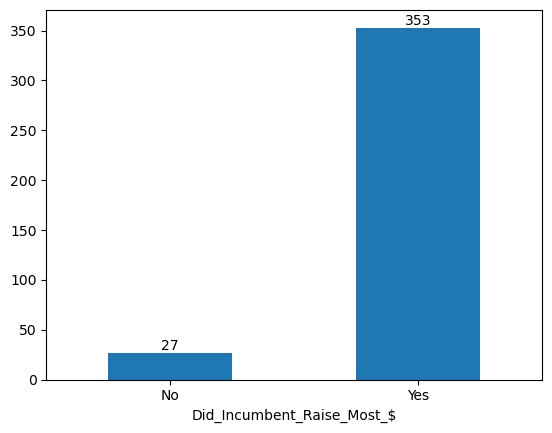

In [9]:
incumbent_df['Did_Incumbent_Raise_Most_$'] = incumbent_df[['Money_Raised_($)','Most_$_Raised_In_District']].apply(compare_cols,axis=1)

raisey_incumbents = incumbent_df.groupby(['Did_Incumbent_Raise_Most_$']).count()['Most_$_Raised_In_District']
pct_raisey_incumbents = raisey_incumbents['Yes']/raisey_incumbents.sum()*100
print(f'The percent of incumbents that raised the most in their district was {pct_raisey_incumbents:.2f}%!')

raisey_incumbents_bar = raisey_incumbents.plot.bar(rot=0)
raisey_incumbents_bar.bar_label(raisey_incumbents_bar.containers[0]);

**Also decided to look at incumbent spending - it seems to match incumbents that raised the most money.**

The percent of incumbents that spent the most in their district was 92.89%!


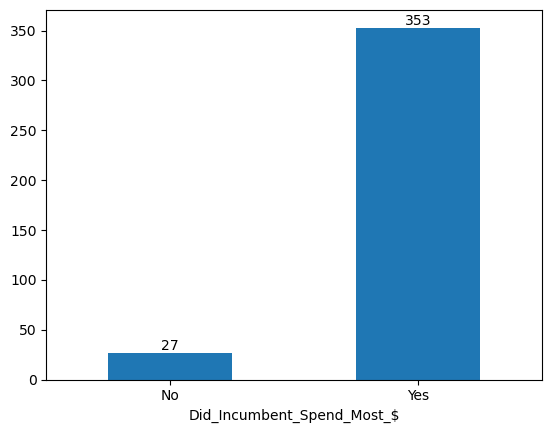

In [10]:
incumbent_df['Did_Incumbent_Spend_Most_$'] = incumbent_df[['Money_Spent_($)','Most_$_Spent_In_District']].apply(compare_cols,axis=1)

spendy_incumbents = incumbent_df.groupby(['Did_Incumbent_Spend_Most_$']).count()['Most_$_Spent_In_District']
pct_spendy_incumbents = spendy_incumbents['Yes']/spendy_incumbents.sum()*100
print(f'The percent of incumbents that spent the most in their district was {pct_spendy_incumbents:.2f}%!')

spendy_incumbents_bar = spendy_incumbents.plot.bar(rot=0)
spendy_incumbents_bar.bar_label(spendy_incumbents_bar.containers[0]);

In [11]:
#Check of random numbers. Concerned that number of winners doesn't equal number of elections.
#Not all winners were shown on site page - calculated a few from vote% - should I hard code the remaining 4?
total_number_of_elections = candidate_info_df.groupby(['State','District']).ngroups
total_number_of_winners = candidate_info_df.groupby(['Is_Winner']).count()
total_number_of_incumbents = candidate_info_df.groupby(['Is_Incumbent?']).count()
#total_number_of_winners
total_number_of_incumbents

,Candidate_Name,Candidate_Party,State,District,Is_Winner,Percent_of_Vote_(%),Money_Raised_($),Money_Spent_($)
Is_Incumbent?,,,,,,,,
No,497,497,497,497,489,448,497,497
Yes,380,380,380,380,379,379,380,380


In [12]:
#Used to look through specific rows of dataframe if necessary
winner_df.iloc[150:200]

,Candidate_Name,Candidate_Party,State,District,Is_Incumbent?,Is_Winner,Percent_of_Vote_(%),Money_Raised_($),Money_Spent_($),Most_$_Raised_In_District,Most_$_Spent_In_District,Did_Winner_Raise_Most_$,Is_Winner_Spendy
150,Jim Banks,Republican,Indiana,3,Yes,Yes,67.8,1202509,769591,1202509,769591,Yes,Yes
151,Jim Baird,Republican,Indiana,4,Yes,Yes,66.6,327727,190158,327727,190158,Yes,Yes
152,Victoria Spartz,Republican,Indiana,5,No,Yes,50.0,3119328,3010203,4010368,3998905,No,No
153,Greg Pence,Republican,Indiana,6,Yes,Yes,68.7,3114448,2804148,3114448,2804148,Yes,Yes
154,Andre Carson,Democrat,Indiana,7,Yes,Yes,62.4,1011635,873962,1011635,873962,Yes,Yes
155,Larry Bucshon,Republican,Indiana,8,Yes,Yes,66.9,1051336,1078646,1051336,1078646,Yes,Yes
156,Trey Hollingsworth,Republican,Indiana,9,Yes,Yes,60.9,1166754,501136,1166754,501136,Yes,Yes
157,Ashley Hinson,Republican,Iowa,1,No,Yes,51.3,5175883,5059211,5901441,5875405,No,No
158,Mariannette Miller-Meeks,Republican,Iowa,2,No,Yes,50.0,2174194,1721926,4232992,4114400,No,No
159,Cindy Axne,Democrat,Iowa,3,Yes,Yes,49.0,6236976,6236994,6236976,6236994,Yes,Yes


**I thought it might be interesting to show the number of winners by party:**

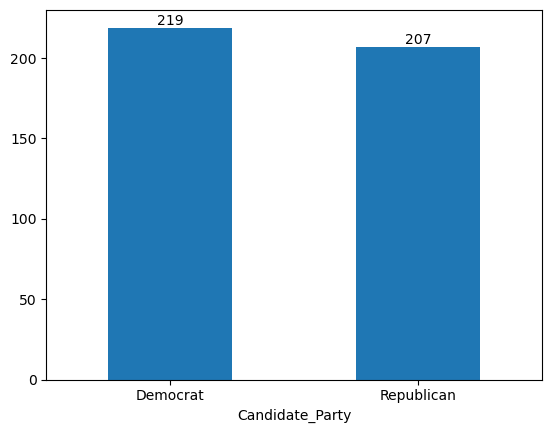

In [13]:
winner_parties = winner_df.groupby(['Candidate_Party']).count()['Candidate_Name']
winner_parties_bar = winner_parties.plot.bar(rot=0)
winner_parties_bar.bar_label(winner_parties_bar.containers[0]);

**Starting Part 3 Here:**

In [14]:
total_district_spending = candidate_info_df.groupby(['State','District'],as_index=False)['Money_Spent_($)'].sum()
#total_district_spending

total_district_spending = total_district_spending.rename(columns = {'Money_Spent_($)':'Total_District_Spending_($)'}).copy()
candidate_info_df_q3 = candidate_info_df.merge(total_district_spending,on=['State','District'],how='left').copy()
candidate_info_df_q3['Pct_District_Spending'] = (100*candidate_info_df_q3['Money_Spent_($)']/candidate_info_df_q3['Total_District_Spending_($)']).round(2)
candidate_info_df_q3 = candidate_info_df_q3.rename(columns = {'Is_Incumbent?':'Is_Incumbent'})

#Make binary column for to make winner 'yes'=1 and winner 'no'=0
candidate_info_df_q3['Is_Winner_Binary'] = candidate_info_df_q3['Is_Winner'].copy()
candidate_info_df_q3['Is_Winner_Binary'] = candidate_info_df_q3['Is_Winner_Binary'].map(dict(Yes=1, No=0)).copy()

#Make binary column for to make incumbent 'yes'=1 and incumbent 'no'=0
candidate_info_df_q3['Is_Incumbent_Binary'] = candidate_info_df_q3['Is_Incumbent'].copy()
candidate_info_df_q3['Is_Incumbent_Binary'] = candidate_info_df_q3['Is_Incumbent_Binary'].map(dict(Yes=1, No=0)).copy()

candidate_info_df_q3.tail(10)

,Candidate_Name,Candidate_Party,State,District,Is_Incumbent,Is_Winner,Percent_of_Vote_(%),Money_Raised_($),Money_Spent_($),Total_District_Spending_($),Pct_District_Spending,Is_Winner_Binary,Is_Incumbent_Binary
867,Scott Fitzgerald,Republican,Wisconsin,5,No,Yes,60.2,1155721,968406,1340205,72.26,1.0,0
868,Tom Palzewicz,Democrat,Wisconsin,5,No,No,39.9,370392,371799,1340205,27.74,0.0,0
869,Glenn Grothman,Republican,Wisconsin,6,Yes,Yes,59.3,1815756,1736659,1982447,87.60,1.0,1
870,Jessica King,Democrat,Wisconsin,6,No,No,40.7,287753,245788,1982447,12.40,0.0,0
871,Tom Tiffany,Republican,Wisconsin,7,Yes,Yes,60.8,2637459,2514740,3747430,67.11,1.0,1
872,Tricia Zunker,Democrat,Wisconsin,7,No,No,39.2,1261957,1232690,3747430,32.89,0.0,0
873,Mike Gallagher,Republican,Wisconsin,8,Yes,Yes,64.0,3202905,2841801,3241717,87.66,1.0,1
874,Amanda Stuck,Democrat,Wisconsin,8,No,No,36.0,416978,399916,3241717,12.34,0.0,0
875,Liz Cheney,Republican,Wyoming,1,Yes,Yes,68.6,3003883,3060167,3192402,95.86,1.0,1
876,Lynnette Grey Bull,Democrat,Wyoming,1,No,No,24.6,134597,132235,3192402,4.14,0.0,0


In [15]:
model_win_by_spending = smf.glm(formula = 'Is_Winner_Binary ~ Pct_District_Spending',
                data = candidate_info_df_q3,
                family = sm.families.Binomial()).fit()
print(model_win_by_spending.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       Is_Winner_Binary   No. Observations:                  868
Model:                            GLM   Df Residuals:                      866
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -209.82
Date:                Tue, 17 Oct 2023   Deviance:                       419.63
Time:                        21:04:43   Pearson chi2:                     554.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5944
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -4.47

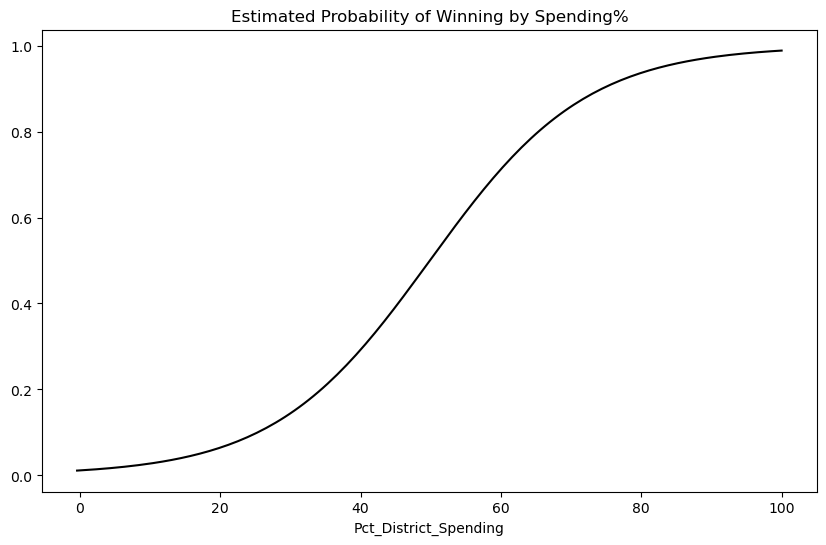

In [16]:
fit_pct_spending_df = pd.DataFrame({
    'Pct_District_Spending': np.linspace(start = candidate_info_df_q3['Pct_District_Spending'].min(),
                               stop = candidate_info_df_q3['Pct_District_Spending'].max(),
                               num = 150)
})

fit_pct_spending_df['fit'] = model_win_by_spending.predict(fit_pct_spending_df)



fit_pct_spending_df.plot(x = 'Pct_District_Spending',
           y= 'fit',
           legend = False,
           figsize = (10,6),
           color = 'black',
           title = 'Estimated Probability of Winning by Spending%');

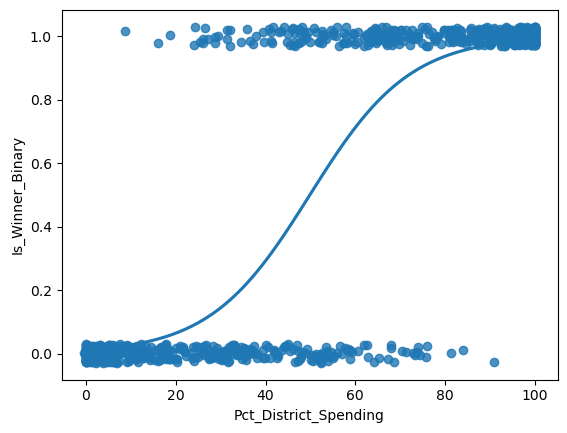

In [17]:
sns.regplot(x = 'Pct_District_Spending', 
            y = 'Is_Winner_Binary', 
            y_jitter = 0.03,
            data = candidate_info_df_q3, 
            logistic = True,
            ci = None);

In [18]:
pct_spend_incumbent_formula = 'Is_Winner_Binary ~ Pct_District_Spending + Is_Incumbent_Binary'
model_win_by_spending_incumbent = smf.glm(formula = pct_spend_incumbent_formula,
                data = candidate_info_df_q3,
                family = sm.families.Binomial()).fit()
print(model_win_by_spending_incumbent.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       Is_Winner_Binary   No. Observations:                  868
Model:                            GLM   Df Residuals:                      865
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -151.42
Date:                Tue, 17 Oct 2023   Deviance:                       302.84
Time:                        21:04:43   Pearson chi2:                     548.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.6455
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -4.38

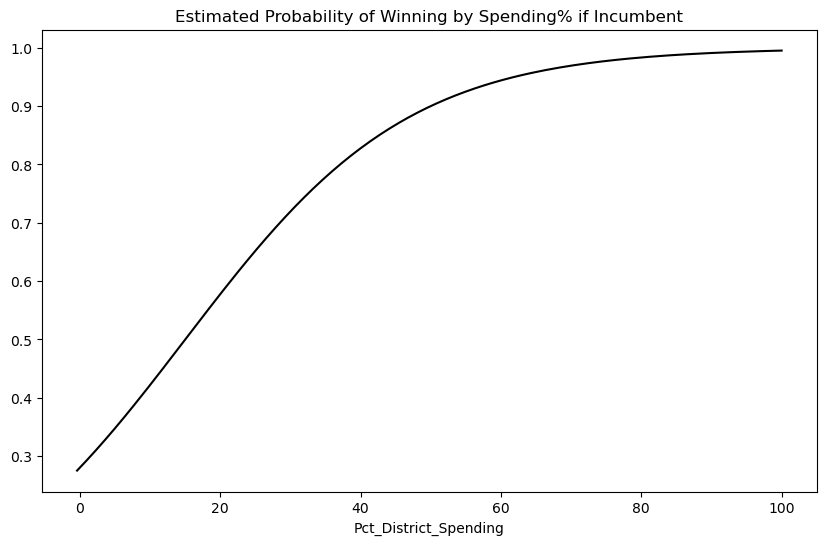

In [19]:
fit_pct_spending_yes_inc_df = pd.DataFrame({
    'Pct_District_Spending': np.linspace(start = candidate_info_df_q3['Pct_District_Spending'].min(),
                               stop = candidate_info_df_q3['Pct_District_Spending'].max(),
                               num = 150),
    'Is_Incumbent_Binary': [1]*150
})

fit_pct_spending_yes_inc_df['fit'] = model_win_by_spending_incumbent.predict(fit_pct_spending_yes_inc_df)


fit_pct_spending_yes_inc_df.plot(x = 'Pct_District_Spending',
           y= 'fit',
           legend = False,
           figsize = (10,6),
           color = 'black',
           title = 'Estimated Probability of Winning by Spending% if Incumbent');

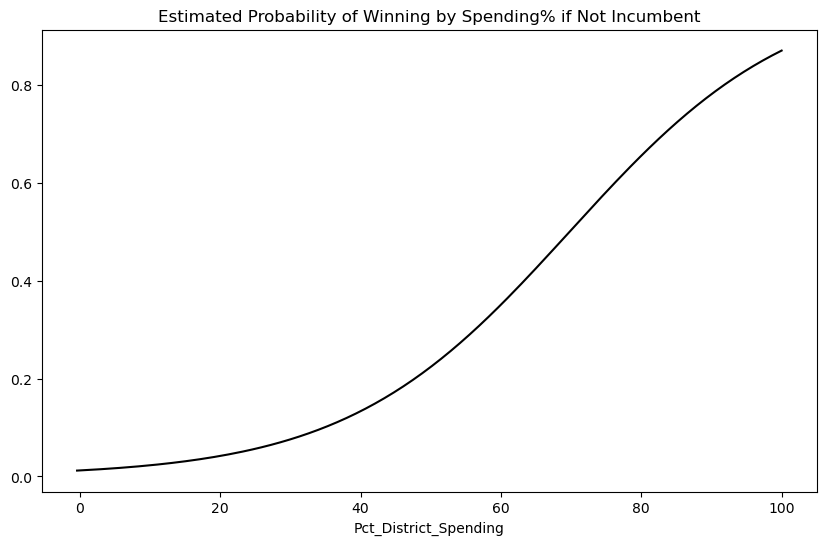

In [20]:
fit_pct_spending_no_inc_df = pd.DataFrame({
    'Pct_District_Spending': np.linspace(start = candidate_info_df_q3['Pct_District_Spending'].min(),
                               stop = candidate_info_df_q3['Pct_District_Spending'].max(),
                               num = 150),
    'Is_Incumbent_Binary': [0]*150
})

fit_pct_spending_no_inc_df['fit'] = model_win_by_spending_incumbent.predict(fit_pct_spending_no_inc_df)


fit_pct_spending_no_inc_df.plot(x = 'Pct_District_Spending',
           y= 'fit',
           legend = False,
           figsize = (10,6),
           color = 'black',
           title = 'Estimated Probability of Winning by Spending% if Not Incumbent');

In [21]:
pct_spend_incumbent_formula_interaction = 'Is_Winner_Binary ~ Pct_District_Spending + Is_Incumbent_Binary + Pct_District_Spending*Is_Incumbent_Binary'
model_win_by_spending_incumbent_inter = smf.glm(formula = pct_spend_incumbent_formula_interaction,
                data = candidate_info_df_q3,
                family = sm.families.Binomial()).fit()
print(model_win_by_spending_incumbent_inter.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       Is_Winner_Binary   No. Observations:                  868
Model:                            GLM   Df Residuals:                      864
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -150.94
Date:                Tue, 17 Oct 2023   Deviance:                       301.87
Time:                        21:04:44   Pearson chi2:                     543.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.6459
Covariance Type:            nonrobust                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

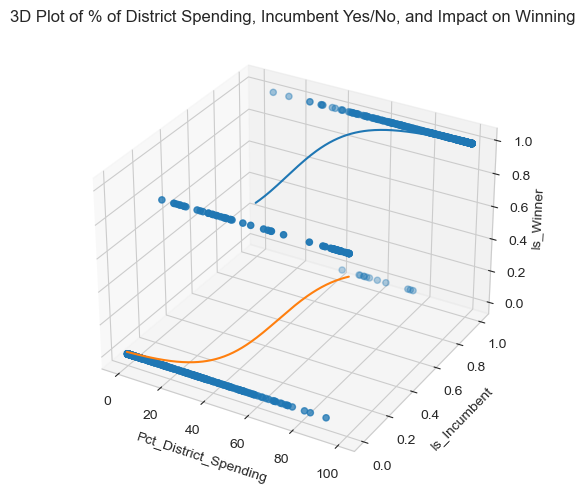

In [22]:
sns.set_style("whitegrid")
plot_omega = 2
plot1 = candidate_info_df_q3['Pct_District_Spending']
plot2 = candidate_info_df_q3['Is_Incumbent_Binary']
plot3 = candidate_info_df_q3['Is_Winner_Binary']
fityesplot1 = fit_pct_spending_yes_inc_df['Pct_District_Spending']
fityesplot2 = fit_pct_spending_yes_inc_df['Is_Incumbent_Binary']
fityesplot3 = fit_pct_spending_yes_inc_df['fit']
fitnoplot1 = fit_pct_spending_no_inc_df['Pct_District_Spending']
fitnoplot2 = fit_pct_spending_no_inc_df['Is_Incumbent_Binary']
fitnoplot3 = fit_pct_spending_no_inc_df['fit']
plt.figure(figsize=(5,5))
plot_axis = plt.axes (projection = '3d')
plot_axis.scatter3D(plot1, plot2, plot3)
plot_axis.plot3D(fityesplot1,fityesplot2,fityesplot3)
plot_axis.plot3D(fitnoplot1,fitnoplot2,fitnoplot3)
plot_axis.set_xlabel('Pct_District_Spending')
plot_axis.set_ylabel('Is_Incumbent')
plot_axis.set_zlabel('Is_Winner')
plot_axis.zaxis.labelpad=-1.15
plot_axis.set(title ='3D Plot of % of District Spending, Incumbent Yes/No, and Impact on Winning')
plt.tight_layout ()
plt.show ()